In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [14]:
#https://www.kaggle.com/zynicide/wine-reviews/version/4

In [15]:
df = pd.read_csv("/home/scott/Downloads/winemag-data-130k-v2.csv")

In [17]:
df['year'] = df.title.str.findall("\d\d\d\d").apply(lambda x: x[0] if len(x) > 0 else None)
mask = df.year.isnull()
df = df[~mask]
df.year = df.year.apply(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125362 entries, 0 to 129970
Data columns (total 15 columns):
Unnamed: 0               125362 non-null int64
country                  125301 non-null object
description              125362 non-null object
designation              88202 non-null object
points                   125362 non-null int64
price                    116838 non-null float64
province                 125301 non-null object
region_1                 104667 non-null object
region_2                 49756 non-null object
taster_name              100200 non-null object
taster_twitter_handle    95334 non-null object
title                    125362 non-null object
variety                  125361 non-null object
winery                   125362 non-null object
year                     125362 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 15.3+ MB


In [19]:
print(round(df.price.mean(), 2))
print(df.price.median())
print(df.price.mode())

35.49
25.0
0    20.0
dtype: float64


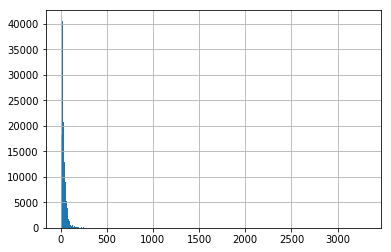

In [20]:
df.price.hist(bins=300)
plt.show()

In [21]:
df.price.max()

3300.0

In [22]:
df.price.fillna(df.price.median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
df['description_length'] = df.description.apply(len)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.year.value_counts().sort_index()

1000        2
1070        1
1150        2
1492        6
1503        1
1607        1
1621        1
1637        2
1752        1
1789        1
1821        4
1827        2
1840        5
1845        3
1847        1
1848        6
1850        3
1852       41
1856        3
1860        7
1868        9
1870        4
1872        3
1875        7
1877        8
1882        4
1887        2
1898       23
1904        1
1912        8
        ...  
1990        5
1991        4
1992       16
1993        3
1994       23
1995       49
1996       67
1997      303
1998      550
1999      641
2000      758
2001      691
2002      365
2003      597
2004     1772
2005     3610
2006     5772
2007     7041
2008     7426
2009     9864
2010    12149
2011    12531
2012    15723
2013    15853
2014    15568
2015    10041
2016     3690
2017       11
3000        1
7200       14
Name: year, Length: 91, dtype: int64

In [25]:
mask = (df.year < 1995) | (df.year > 2017)
df = df[~mask]

In [26]:
df.points.min(), df.points.max()

(80, 100)

In [27]:
df['points_normalized'] = (df.points - 80) / 2

In [28]:
df.points_normalized.min(), df.points_normalized.max()

(0.0, 10.0)

In [29]:
df.dropna(subset=['country'], inplace=True)

In [30]:
len(df)

125011

In [31]:
df.drop(df.columns[0], axis=1, inplace=True)

In [34]:
df.to_excel("wine_data.xlsx")

In [33]:
df.year.value_counts()

2013    15844
2012    15717
2014    15552
2011    12530
2010    12149
2015    10020
2009     9864
2008     7426
2007     7041
2006     5772
2016     3682
2005     3610
2004     1772
2000      758
2001      691
1999      641
2003      597
1998      550
2002      365
1997      303
1996       67
1995       49
2017       11
Name: year, dtype: int64